# Analisis Pemanfaatan Teknologi di Pemerintahan Daerah Jawa Barat

## Tugas Praproses Data (2 Oktober 2023)
## Kelompok 2
1. Fauziyah Zayyan Nur
2. Muhamad Irfan
3. Muhammad Hanif Abdillah
4. Raffi Ardhi Naufal
5. Ridwan Abdul Jamil

### Pendahuluan

Pada zaman digital seperti sekarang, teknologi informasi memainkan peran kunci dalam penyelenggaraan pemerintahan. Salah satu aspek penting adalah pengelolaan aplikasi dan hosting. Mungkin ada yang bertanya, "Apa itu hosting?" Hosting adalah tempat penyimpanan dan akses data atau informasi melalui internet. Sederhananya, jika aplikasi adalah program yang bisa Anda gunakan, maka hosting adalah tempat di mana aplikasi itu tinggal dan dapat diakses oleh masyarakat.

Dalam konteks Jawa Barat, kami tertarik untuk melihat seberapa banyak aplikasi umum dan hosting yang digunakan oleh perangkat daerah. Data yang kami peroleh telah melalui tahap persiapan agar mudah dipahami. Kami mengubah nama-nama atribut dan melakukan penyesuaian agar lebih rapi.

Data yang kami analisis mencakup informasi tentang provinsi, perangkat daerah, jumlah aplikasi, dan jumlah hosting. Namun, ada beberapa data yang belum terisi. Untuk mengatasi ini, kami menganggap daerah-daerah tersebut belum menggunakan layanan hosting dan mengisi nilai-nilai kosong.

Analisis ini akan memberi gambaran tentang sebaran penggunaan aplikasi dan hosting berdasarkan tahun. Kami juga akan membandingkan kinerja perangkat daerah dalam penggunaan hosting pada tahun-tahun berbeda. Semoga analisis ini memberikan gambaran yang lebih jelas tentang pemanfaatan teknologi dalam pemerintahan daerah di Jawa Barat.

 ### Praproses Data
 - Mengubah penggunaan huruf pada nama atribut dengan lower case
 - Mengubah penggunaan ' ' (spasi) menggunakan '_' (underscore)
 - Mengubah nama atribut 'nama_perangkat_daerah' menjadi 'perangkat_daerah' pada file 'diskominfo-od_18163_jumlah_layanan_hosting_berdasarkan_perangkat_daerah_data'

### Deklarasi Library

In [37]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###  Load Dataset

In [38]:
dataApk = pd.read_csv("C:\\Users\Raffi Ardhi Naufal\\Downloads\Explanatory-Data-Analysis-main\\diskominfo-od_17142_jml_layanan_aplikasi_umum_aplikasi_khusus__perangkat_d_data.csv")
dataApk.head()

,id,kode_provinsi,nama_provinsi,perangkat_daerah,jumlah_aplikasi,satuan,tahun
0,1,32,JAWA BARAT,BADAN KEPEGAWAIAN DAERAH,8,ALAMAT WEB,2020
1,2,32,JAWA BARAT,BADAN KESATUAN BANGSA DAN POLITIK,1,ALAMAT WEB,2020
2,3,32,JAWA BARAT,BADAN PENANGGULANGAN BENCANA DAERAH,2,ALAMAT WEB,2020
3,4,32,JAWA BARAT,BADAN PENDAPATAN DAERAH,8,ALAMAT WEB,2020
4,5,32,JAWA BARAT,BADAN PENELITIAN DAN PENGEMBANGAN DAERAH,1,ALAMAT WEB,2020


In [39]:
dataHost = pd.read_csv("C:\\Users\Raffi Ardhi Naufal\\Downloads\Explanatory-Data-Analysis-main\\diskominfo-od_18163_jumlah_layanan_hosting_berdasarkan_perangkat_daerah_data.csv")
dataHost.head()

,id,kode_provinsi,nama_provinsi,nama_perangkat_daerah,jumlah_layanan_hosting,satuan,tahun
0,1,32,JAWA BARAT,BADAN KEPEGAWAIAN DAERAH,1,KALI,2020
1,2,32,JAWA BARAT,BADAN KESATUAN BANGSA DAN POLITIK,1,KALI,2020
2,3,32,JAWA BARAT,BADAN PENANGGULANGAN BENCANA DAERAH,3,KALI,2020
3,4,32,JAWA BARAT,BADAN PENDAPATAN DAERAH,0,KALI,2020
4,5,32,JAWA BARAT,BADAN PENELITIAN DAN PENGEMBANGAN DAERAH,2,KALI,2020


### Eksplorasi Dataset

In [5]:
dataApk.info()
dataHost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                91 non-null     int64 
 1   kode_provinsi     91 non-null     int64 
 2   nama_provinsi     91 non-null     object
 3   perangkat_daerah  91 non-null     object
 4   jumlah_aplikasi   91 non-null     int64 
 5   satuan            91 non-null     object
 6   tahun             91 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 5.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      76 non-null     int64 
 1   kode_provinsi           76 non-null     int64 
 2   nama_provinsi           76 non-null     object
 3   nama_perangkat_daerah   76 non-null     object
 4   jumlah_layanan_

### Mengubah nama atribut pada dataframe

In [6]:
dataApk = dataApk.rename(columns = str.lower)
dataHost = dataHost.rename(columns = str.lower)

In [7]:
dataApk.columns = dataApk.columns.str.replace(' ','_', regex=True)
dataHost.columns = dataHost.columns.str.replace(' ','_', regex=True)

### Mengubah nama kolom pada dataframe hosting

In [8]:
dataHost.rename(columns={'nama_perangkat_daerah': 'perangkat_daerah'}, inplace=True)

### Merge kedua dataset

In [9]:
dataMerge = pd.merge(dataApk, dataHost, how = "left", on=["perangkat_daerah"])
dataMerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 151
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_x                    152 non-null    int64  
 1   kode_provinsi_x         152 non-null    int64  
 2   nama_provinsi_x         152 non-null    object 
 3   perangkat_daerah        152 non-null    object 
 4   jumlah_aplikasi         152 non-null    int64  
 5   satuan_x                152 non-null    object 
 6   tahun_x                 152 non-null    int64  
 7   id_y                    122 non-null    float64
 8   kode_provinsi_y         122 non-null    float64
 9   nama_provinsi_y         122 non-null    object 
 10  jumlah_layanan_hosting  122 non-null    float64
 11  satuan_y                122 non-null    object 
 12  tahun_y                 122 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 16.6+ KB


### Menghapus record data pada beberapa kolom tertera

In [10]:
deleteColumn = ["id_x", "id_y", "kode_provinsi_y", "nama_provinsi_y", "satuan_y"]
dataMerge = dataMerge.drop(columns = deleteColumn)

### Mengubah nama atribut pada beberapa kolom tertera

In [11]:
dataMerge.rename(columns={'kode_provinsi_x' : 'kode_provinsi', 
                          'nama_provinsi_x' : 'nama_provinsi', 
                          'satuan_x' : 'satuan', 
                          'tahun_x' : 'tahun_aplikasi', 
                          'tahun_y' : 'tahun_hosting'}, 
                 inplace=True)

###  Mengubah tipedata 'tahun_hosting' dan 'tahun_aplikasi'

In [12]:
dataMerge["tahun_hosting"] = dataMerge["tahun_hosting"].astype("object")
dataMerge["tahun_aplikasi"] = dataMerge["tahun_aplikasi"].astype("object")

###  Mengecek data NaN pada dataMerge

In [13]:
dataMerge.isna().sum()

kode_provinsi              0
nama_provinsi              0
perangkat_daerah           0
jumlah_aplikasi            0
satuan                     0
tahun_aplikasi             0
jumlah_layanan_hosting    30
tahun_hosting             30
dtype: int64

###  Melihat data yang NaN pada atribut 'jumlah_layanan_hosting'

In [14]:
dataMerge[(dataMerge.jumlah_layanan_hosting.isna())]

,kode_provinsi,nama_provinsi,perangkat_daerah,jumlah_aplikasi,satuan,tahun_aplikasi,jumlah_layanan_hosting,tahun_hosting
16,32,JAWA BARAT,BIRO BADAN USAHA DAN MILIK DAERAH,1,ALAMAT WEB,2020,NaN,NaN
17,32,JAWA BARAT,BIRO HUBUNGAN MASYARAKAT DAN PROTOKOL,5,ALAMAT WEB,2020,NaN,NaN
18,32,JAWA BARAT,BIRO HUKUN DAN HAK AZASI MANUSIA,3,ALAMAT WEB,2020,NaN,NaN
19,32,JAWA BARAT,BIRO ORGANISASI,3,ALAMAT WEB,2020,NaN,NaN
20,32,JAWA BARAT,BIRO PELAYANAN DAN PENGEMBANGAN SOSIAL,2,ALAMAT WEB,2020,NaN,NaN
21,32,JAWA BARAT,BIRO PEMERINTAHAN DAN KERJASAMA,6,ALAMAT WEB,2020,NaN,NaN
22,32,JAWA BARAT,BIRO PENGADAAN BARANG DAN JASA,3,ALAMAT WEB,2020,NaN,NaN
23,32,JAWA BARAT,BIRO PEREKONOMIAN,1,ALAMAT WEB,2020,NaN,NaN
24,32,JAWA BARAT,BIRO UMUM,2,ALAMAT WEB,2020,NaN,NaN
49,32,JAWA BARAT,"DINAS PEMBERDAYAAN PEREMPUAN, PERLINDUNGAN ANA...",4,ALAMAT WEB,2020,NaN,NaN


### Melihat data yang NaN pada atribut 'tahun_hosting'

In [15]:
dataMerge[(dataMerge.tahun_hosting.isna())]

,kode_provinsi,nama_provinsi,perangkat_daerah,jumlah_aplikasi,satuan,tahun_aplikasi,jumlah_layanan_hosting,tahun_hosting
16,32,JAWA BARAT,BIRO BADAN USAHA DAN MILIK DAERAH,1,ALAMAT WEB,2020,NaN,NaN
17,32,JAWA BARAT,BIRO HUBUNGAN MASYARAKAT DAN PROTOKOL,5,ALAMAT WEB,2020,NaN,NaN
18,32,JAWA BARAT,BIRO HUKUN DAN HAK AZASI MANUSIA,3,ALAMAT WEB,2020,NaN,NaN
19,32,JAWA BARAT,BIRO ORGANISASI,3,ALAMAT WEB,2020,NaN,NaN
20,32,JAWA BARAT,BIRO PELAYANAN DAN PENGEMBANGAN SOSIAL,2,ALAMAT WEB,2020,NaN,NaN
21,32,JAWA BARAT,BIRO PEMERINTAHAN DAN KERJASAMA,6,ALAMAT WEB,2020,NaN,NaN
22,32,JAWA BARAT,BIRO PENGADAAN BARANG DAN JASA,3,ALAMAT WEB,2020,NaN,NaN
23,32,JAWA BARAT,BIRO PEREKONOMIAN,1,ALAMAT WEB,2020,NaN,NaN
24,32,JAWA BARAT,BIRO UMUM,2,ALAMAT WEB,2020,NaN,NaN
49,32,JAWA BARAT,"DINAS PEMBERDAYAAN PEREMPUAN, PERLINDUNGAN ANA...",4,ALAMAT WEB,2020,NaN,NaN


### Mengisi data NaN pada 'jumlah_layanan_hosting' dengan value 0 dan 'tahun_hosting' dengan “Tidak Hosting”

In [16]:
dataMerge["tahun_hosting"].fillna("Tidak Hosting", inplace = True)

In [17]:
dataMerge["jumlah_layanan_hosting"].fillna(0, inplace = True)

### Mengubah tipedata pada atribut kolom 'jumlah_layanan_hosting' menjadi int dan replace value 2020.0 dengan “2020” dan 2021.0 dengan “2021”

In [18]:
dataMerge["jumlah_layanan_hosting"] = dataMerge["jumlah_layanan_hosting"].astype("int")

In [19]:
dataMerge['tahun_hosting'] = dataMerge['tahun_hosting'].replace({2020.0: '2020', 2021.0: '2021'})

### Visualisasi Data

Distribusi jumlah layanan hosting, dan setiap histogram akan dipisahkan berdasarkan tahun hosting

array([[<Axes: title={'center': '2020'}>,
        <Axes: title={'center': '2021'}>],
       [<Axes: title={'center': 'Tidak Hosting'}>, <Axes: >]],
      dtype=object)

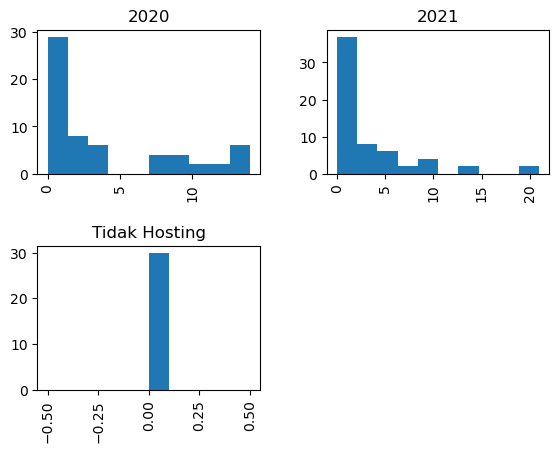

In [20]:
dataMerge.hist(by ='tahun_hosting', column =['jumlah_layanan_hosting'], grid = False)

Distribusi data jumlah aplikasi pertahun

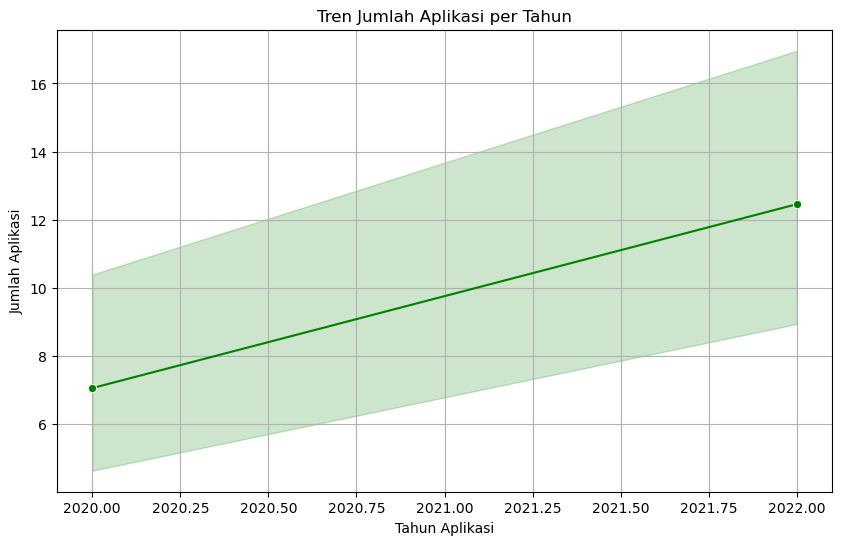

In [46]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=dataMerge, x='tahun_aplikasi', y='jumlah_aplikasi', marker='o', color='green')

plt.title('Tren Jumlah Aplikasi per Tahun')
plt.xlabel('Tahun Aplikasi')
plt.ylabel('Jumlah Aplikasi')

plt.grid(True)
plt.show()
